In [56]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colors = ["#e74c3c", "#3498db", "#2ecc71"]
sns.set_palette(sns.color_palette(colors))
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'Times New Roman'

In [57]:
df = pd.read_csv('data/reviews_en_sentences.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sentence_id  6903 non-null   object 
 1   review_id    6903 non-null   float64
 2   review       6903 non-null   object 
 3   word_count   6903 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 215.8+ KB


# Labeling with VADER

In [58]:
# initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [59]:
# define a function to apply sentiment analysis to each review
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

In [60]:
## apply the sentiment analysis function to the 'text' column of the dataframe
df['vader'] = df['review'].apply(get_sentiment)
df.head()

,sentence_id,review_id,review,word_count,vader
0,1.1.1,1.1,It is such a nice and romantic restaurant for ...,18,0.8176
1,1.1.2,1.1,Food is so nice with western courses,7,0.5598
2,1.1.3,1.1,Drinks are interesting to enjoy,5,0.7096
3,1.1.4,1.1,We had a very nice dinner with our boss and co...,11,0.4754
4,1.1.5,1.1,Thank you for nice preparation as well,7,0.7506


In [61]:
df.sample(20)

,sentence_id,review_id,review,word_count,vader
3668,98.6.2,98.600,The meat was tough the soup was cold and servi...,11,-0.1280
3474,97.4.3,97.400,First off the restaurant is located in a shabb...,19,0.0000
6499,165.5.9,165.500,Slow and neglected service all servers were st...,25,-0.4774
2972,89.7.1,89.700,Good KBBQ restaurant by the airport,6,0.4404
2031,61.8.2,61.800,We came on Sunday for lunch and the place was ...,11,0.0000
1537,41.7.1,41.700,I ordered half of the grilled eel with salt an...,11,0.0000
3181,92.144.1,92.144,Great place for Wedding 3,5,0.6249
3608,97.81.1,97.810,Chinese food is good,4,0.4404
6338,164.1.2,164.100,The place is beautifully decorated and the foo...,21,0.8126
4091,140.17.5,140.170,And the setting is pretty nice upstairs althou...,21,0.7717


In [62]:
#sentiment label with positive, negative as 1 0
df['sentiment'] = df['vader'].apply(lambda x: 1 if x >= 0 else 0)
df.head()

,sentence_id,review_id,review,word_count,vader,sentiment
0,1.1.1,1.1,It is such a nice and romantic restaurant for ...,18,0.8176,1
1,1.1.2,1.1,Food is so nice with western courses,7,0.5598,1
2,1.1.3,1.1,Drinks are interesting to enjoy,5,0.7096,1
3,1.1.4,1.1,We had a very nice dinner with our boss and co...,11,0.4754,1
4,1.1.5,1.1,Thank you for nice preparation as well,7,0.7506,1


In [63]:
df.drop(columns=['vader'], inplace=True)
df.rename(columns={'sentiment':'vader'}, inplace=True)


# Labeling with textblob

In [64]:
#define a function to apply sentiment analysis to each review
def textblob_sentiment(text):
    scores = TextBlob(text)
    return scores.sentiment.polarity

In [65]:
## apply the sentiment analysis function to the 'text' column of the dataframe
df['textblob'] = df['review'].apply(textblob_sentiment)
df.head()

,sentence_id,review_id,review,word_count,vader,textblob
0,1.1.1,1.1,It is such a nice and romantic restaurant for ...,18,1,0.181061
1,1.1.2,1.1,Food is so nice with western courses,7,1,0.300000
2,1.1.3,1.1,Drinks are interesting to enjoy,5,1,0.450000
3,1.1.4,1.1,We had a very nice dinner with our boss and co...,11,1,0.780000
4,1.1.5,1.1,Thank you for nice preparation as well,7,1,0.600000


In [66]:
#sentiment label with positive, negative as 1 0
df['textblob'] = df['textblob'].apply(lambda x: 1 if x >= 0 else 0)


In [67]:
df.head()

,sentence_id,review_id,review,word_count,vader,textblob
0,1.1.1,1.1,It is such a nice and romantic restaurant for ...,18,1,1
1,1.1.2,1.1,Food is so nice with western courses,7,1,1
2,1.1.3,1.1,Drinks are interesting to enjoy,5,1,1
3,1.1.4,1.1,We had a very nice dinner with our boss and co...,11,1,1
4,1.1.5,1.1,Thank you for nice preparation as well,7,1,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sentence_id  6903 non-null   object 
 1   review_id    6903 non-null   float64
 2   review       6903 non-null   object 
 3   word_count   6903 non-null   int64  
 4   vader        6903 non-null   int64  
 5   textblob     6903 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 323.7+ KB


In [69]:
df.to_csv('data/labeled.csv', index=False)

# Comparing labels from VADER and Textblob

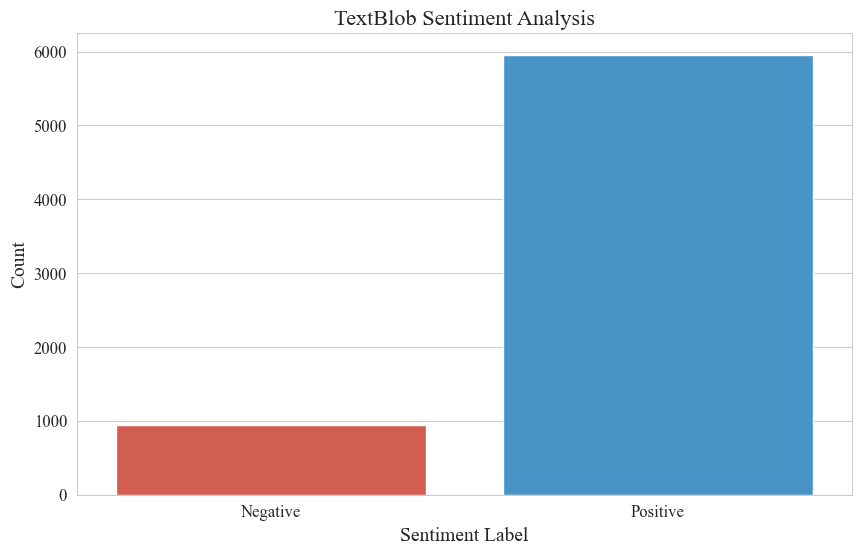

In [70]:
#plot both positive and negative from textblob
plt.figure(figsize=(10, 6))
sns.countplot(x='textblob', data=df, palette=colors)
plt.title('TextBlob Sentiment Analysis', fontsize=16)
plt.xlabel('Sentiment Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Negative', 'Positive'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

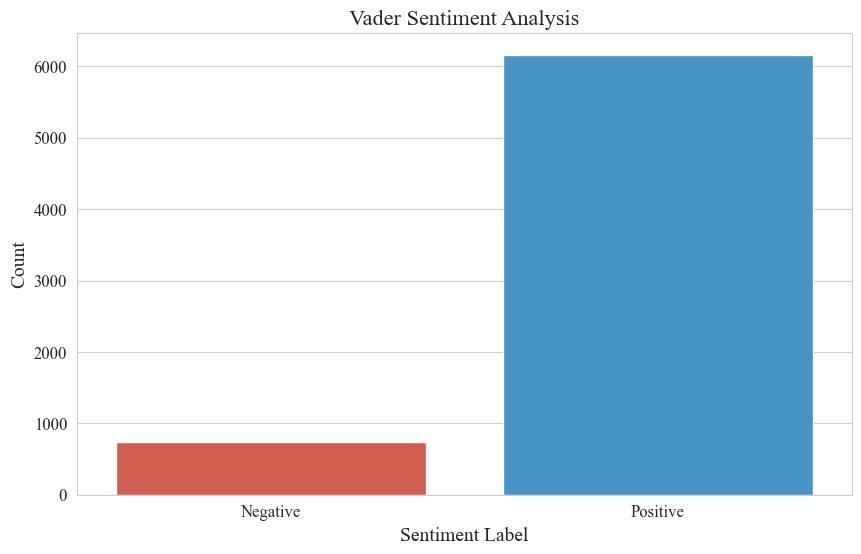

In [71]:
#plot both positive and negative from vader
plt.figure(figsize=(10, 6))
sns.countplot(x='vader', data=df, palette=colors)
plt.title('Vader Sentiment Analysis', fontsize=16)
plt.xlabel('Sentiment Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Negative', 'Positive'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()